In [1]:
import os, random
import pandas as pd
import numpy as np
import datetime as dt
import pandas_ta as ta
import yfinance as yf

In [2]:
df = yf.download("QQQ", start ='2013-12-22' , end ='2023-12-22' , progress=False)

In [3]:
# add features
df['o2c'] = df['Open'] - df['Close']
df['h2l'] = df['High'] - df['Low']

In [4]:
data = df.copy()

In [5]:
# add all factors
data.ta.strategy('All')

131it [00:02, 45.55it/s]


In [6]:
# define target (label)
data['predict'] = np.where(.995*data['Adj Close'].shift(-10) > data['Adj Close'], 1, 0)

# drop unwanted columns
data.drop(['Open','High','Low','Close','HILOl_13_21', 'HILOs_13_21', 'PSARl_0.02_0.2', 'PSARs_0.02_0.2', 'PSARaf_0.02_0.2', 'QQEl_14_5_4.236', 'QQEs_14_5_4.236', 'SUPERTl_7_3.0', 'SUPERTs_7_3.0'], axis=1, inplace=True)
data = data.dropna()

data.head(10)

,Adj Close,Volume,o2c,h2l,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ACCBL_20,ACCBM_20,...,VTXP_14,VTXM_14,VWAP_D,VWMA_10,WCP,WILLR_14,WMA_10,ZL_EMA_10,ZS_30,predict
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-13,81.474556,30311900,0.019997,0.489998,87.166001,88.416988,85.915014,1.250987,83.975365,86.9810,...,1.026792,0.927781,88.340001,87.265404,88.327501,-9.142848,87.401819,87.678440,1.117167,1
2014-05-14,81.050034,26483600,0.189995,0.729996,87.474668,88.690922,86.258414,1.216254,84.342643,87.1200,...,1.001225,0.979805,87.933334,87.291810,87.907501,-22.285679,87.486365,87.951451,0.825349,1
2014-05-15,80.413307,59680300,0.669998,1.379997,87.582668,88.809838,86.355497,1.227170,84.388542,87.1680,...,1.004346,0.965239,87.226667,87.236773,87.205000,-42.000035,87.437455,87.865732,0.333878,1
2014-05-16,80.939339,66804100,-0.470001,1.120003,87.756001,88.976027,86.535975,1.220026,84.427180,87.2435,...,1.065660,0.972423,87.370000,87.286350,87.455000,-29.220811,87.501455,87.742871,0.933547,1
2014-05-19,81.502228,32017000,-0.870003,1.159996,87.779334,88.995358,86.563310,1.216024,84.460538,87.3175,...,1.029910,0.940832,88.026667,87.319668,88.100000,-9.415609,87.672364,87.853257,1.412997,1
2014-05-20,81.206932,33716000,0.279999,0.959999,87.727334,88.926289,86.528378,1.198956,84.473231,87.3410,...,1.037013,0.942208,88.079999,87.411441,88.059999,-19.805203,87.778364,87.910847,1.042748,1
2014-05-21,81.982079,36837700,-0.679993,0.779999,87.863333,89.041692,86.684975,1.178358,84.550160,87.4450,...,1.010357,0.959871,88.613332,87.682300,88.669998,-1.488186,88.015454,88.388873,1.675559,1
2014-05-22,82.341980,30617100,-0.290001,0.680000,88.252000,89.397135,87.106866,1.145135,84.744527,87.5270,...,1.057517,0.918301,89.170003,87.946989,89.185003,-6.329107,88.282000,88.818170,1.877989,1
2014-05-23,82.941818,22687300,-0.559998,0.779999,88.704667,89.825459,87.583875,1.120792,84.942049,87.7115,...,1.115670,0.878278,89.633334,88.169394,89.695000,-0.457763,88.616727,89.294866,2.199106,1


In [7]:
c = data['predict'].value_counts()
c

1    1401
0     994
Name: predict, dtype: int64

In [8]:
# class weight function
def cwts(dfs):
    c0, c1 = np.bincount(dfs['predict'])
    w0=(1/c0)*(len(df))/2
    w1=(1/c1)*(len(df))/2
    return {0: w0, 1: w1}

In [9]:
%%time
cwts(data)

CPU times: user 163 µs, sys: 45 µs, total: 208 µs
Wall time: 228 µs


{0: 1.2660965794768613, 1: 0.8982869379014989}

In [10]:
# class weight function
def cwts(dfs):
    c0, c1 = np.bincount(dfs['predict'])
    w0 = df.shape[0] / (2 * c0)
    w1 = df.shape[0] / (2 * c1)
    return {0: np.power(w0, 1), 1: np.power(w1, 1)}

In [12]:

cwts(data)

{0: 1.2660965794768613, 1: 0.8982869379014989}

In [13]:
# class weight function
def cwts(dfs):
    c0, c1 = np.bincount(dfs['predict'])
    w0 = df.shape[0] / (2 * c0)
    w1 = df.shape[0] / (2 * c1)
    return {0: np.power(w0, 5), 1: np.power(w1, 5)}

In [14]:
# check class weights
class_weight = cwts(data)
class_weight

{0: 3.2533753921685356, 1: 0.5848916522059089}

In [15]:
X = data.drop(['predict','Adj Close'], axis=1)
feature_names = X.columns
X.head()

,Volume,o2c,h2l,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ACCBL_20,ACCBM_20,ACCBU_20,...,VIDYA_14,VTXP_14,VTXM_14,VWAP_D,VWMA_10,WCP,WILLR_14,WMA_10,ZL_EMA_10,ZS_30
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-13,30311900,0.019997,0.489998,87.166001,88.416988,85.915014,1.250987,83.975365,86.9810,89.730368,...,79.947811,1.026792,0.927781,88.340001,87.265404,88.327501,-9.142848,87.401819,87.678440,1.117167
2014-05-14,26483600,0.189995,0.729996,87.474668,88.690922,86.258414,1.216254,84.342643,87.1200,89.715145,...,79.982747,1.001225,0.979805,87.933334,87.291810,87.907501,-22.285679,87.486365,87.951451,0.825349
2014-05-15,59680300,0.669998,1.379997,87.582668,88.809838,86.355497,1.227170,84.388542,87.1680,89.833541,...,80.122007,1.004346,0.965239,87.226667,87.236773,87.205000,-42.000035,87.437455,87.865732,0.333878
2014-05-16,66804100,-0.470001,1.120003,87.756001,88.976027,86.535975,1.220026,84.427180,87.2435,89.902181,...,80.306499,1.065660,0.972423,87.370000,87.286350,87.455000,-29.220811,87.501455,87.742871,0.933547
2014-05-19,32017000,-0.870003,1.159996,87.779334,88.995358,86.563310,1.216024,84.460538,87.3175,90.015538,...,80.490936,1.029910,0.940832,88.026667,87.319668,88.100000,-9.415609,87.672364,87.853257,1.412997


In [16]:
y = data['predict'].values
# pandas-ta converts all dtype to objects
y = y.astype(int)
y

array([1, 1, 1, ..., 1, 1, 1])

In [17]:
np.bincount(y)

array([ 994, 1401])

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (train_test_split, RandomizedSearchCV,TimeSeriesSplit,cross_val_score)
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (precision_recall_curve,roc_curve,RocCurveDisplay,ConfusionMatrixDisplay)

from sklearn.metrics import (accuracy_score,f1_score,recall_score,precision_score,roc_auc_score,auc)

from sklearn.metrics import (classification_report,confusion_matrix)

In [19]:
# Always keep shuffle = False for financial time series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# convert to array
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

# Output the train and test data size
print(f"Train and Test Size {len(X_train)}, {len(X_test)}")

Train and Test Size 1916, 479


In [20]:
# class weight function
def cwts(dfs):
    c0, c1 = np.bincount(dfs['predict'])
    w0 = df.shape[0] / (2 * c0)
    w1 = df.shape[0] / (2 * c1)
    return {0: np.power(w0, 3), 1: np.power(w1, 3)}

In [21]:
# define random forest classifier
forest = RandomForestClassifier(n_jobs=-1,
                                class_weight=cwts(data),
                                random_state=42,
                                max_depth=5
                                )

# train the model
forest.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 2.029553511435157,
                                     1: 0.7248451774442556},
                       max_depth=5, n_jobs=-1, random_state=42)

In [22]:
from sklearn.metrics import balanced_accuracy_score

# print scores
print("Accuracy Score \t\t", balanced_accuracy_score(y_test, forest.predict(X_test)))

Accuracy Score 		 0.6577396519859121


In [23]:
#roc_auc_score

In [24]:
np.bincount(forest.predict(X_test))

array([139, 340])

In [25]:
np.bincount(y_test)

array([242, 237])

In [27]:
from boruta import BorutaPy

In [28]:
# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=0)

# find all relevant features
# takes input in array format not as dataframe
feat_selector.fit(X_train, y_train)

# check selected features
print(feat_selector.support_)

# check ranking of features
print(feat_selector.ranking_)

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	272
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	272
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	272
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	272
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	272
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	272
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	272
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	103
Tentative: 	74
Rejected: 	95
Iteration: 	9 / 100
Confirmed: 	103
Tentative: 	74
Rejected: 	95
Iteration: 	10 / 100
Confirmed: 	103
Tentative: 	74
Rejected: 	95
Iteration: 	11 / 100
Confirmed: 	103
Tentative: 	74
Rejected: 	95
Iteration: 	12 / 100
Confirmed: 	136
Tentative: 	41
Rejected: 	95
Iteration: 	13 / 100
Confirmed: 	136
Tentative: 	41
Rejected: 	95
Iteration: 	14 / 100
Confirmed: 	136
Tentative: 	41
Rejected: 	95
Iteration: 	15 / 100
Confirmed: 	136
Tentative: 	41
Rejected: 	95
Iteration: 	16 / 100
Confirmed: 	

In [29]:
# zip my names, ranks, and decisions in a single iterable
feature_ranks = list(zip(feature_names,
                         feat_selector.ranking_,
                         feat_selector.support_))

# iterate through and print out the results
for feat in feature_ranks:
    print(f'Feature: {feat[0]:<30} Rank: {feat[1]:<5} Keep: {feat[2]}')

Feature: Volume                         Rank: 13    Keep: False
Feature: o2c                            Rank: 24    Keep: False
Feature: h2l                            Rank: 14    Keep: False
Feature: ABER_ZG_5_15                   Rank: 1     Keep: True
Feature: ABER_SG_5_15                   Rank: 1     Keep: True
Feature: ABER_XG_5_15                   Rank: 1     Keep: True
Feature: ABER_ATR_5_15                  Rank: 1     Keep: True
Feature: ACCBL_20                       Rank: 1     Keep: True
Feature: ACCBM_20                       Rank: 1     Keep: True
Feature: ACCBU_20                       Rank: 1     Keep: True
Feature: AD                             Rank: 1     Keep: True
Feature: ADOSC_3_10                     Rank: 1     Keep: True
Feature: ADX_14                         Rank: 1     Keep: True
Feature: DMP_14                         Rank: 1     Keep: True
Feature: DMN_14                         Rank: 1     Keep: True
Feature: ALMA_10_6.0_0.85               Rank: 1     

In [30]:
selected_rf_features = pd.DataFrame({'Feature':feature_names,
                                     'Ranking':feat_selector.ranking_})

# selected_rf_features#.sort_values(by='Ranking')

selected_rf_features[selected_rf_features['Ranking']<=5]

,Feature,Ranking
3,ABER_ZG_5_15,1
4,ABER_SG_5_15,1
5,ABER_XG_5_15,1
6,ABER_ATR_5_15,1
7,ACCBL_20,1
...,...,...
267,WCP,1
268,WILLR_14,1
269,WMA_10,1
270,ZL_EMA_10,1


In [31]:
# check the shape
X_filtered.shape

(1916, 161)

In [32]:
# fit with selected features
forest.fit(X_filtered, y_train)

RandomForestClassifier(class_weight={0: 2.029553511435157,
                                     1: 0.7248451774442556},
                       max_depth=5, n_estimators=374, n_jobs=-1,
                       random_state=RandomState(MT19937) at 0x7F97797C4740)

In [33]:
# first apply feature selector transform to make sure same features are selected
X_test_filtered = feat_selector.transform(X_test)
X_test_filtered

array([[ 3.87088668e+02,  3.94892694e+02,  3.79284641e+02, ...,
         3.89198911e+02,  3.85431675e+02, -2.24674606e+00],
       [ 3.86890000e+02,  3.94795758e+02,  3.78984243e+02, ...,
         3.88707455e+02,  3.84693188e+02, -7.18755272e-01],
       [ 3.86756002e+02,  3.94530041e+02,  3.78981962e+02, ...,
         3.89234548e+02,  3.87668977e+02,  1.12500866e-01],
       ...,
       [ 3.72082001e+02,  3.77846315e+02,  3.66317686e+02, ...,
         3.69751640e+02,  3.75384906e+02,  1.89833767e+00],
       [ 3.73737333e+02,  3.79327361e+02,  3.68147305e+02, ...,
         3.71944547e+02,  3.76536736e+02,  1.62071902e+00],
       [ 3.76366667e+02,  3.82187361e+02,  3.70545972e+02, ...,
         3.75104545e+02,  3.80388233e+02,  2.22232857e+00]])

In [34]:
# check the shape
X_test_filtered.shape

(479, 161)

In [35]:
# predict labels with unseen dataset
prediction = forest.predict(X_test_filtered)

In [36]:
# print scores
print("Accuracy Score \t\t", balanced_accuracy_score(y_test, prediction))

Accuracy Score 		 0.631098092548035


In [37]:
# Classification Report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.78      0.37      0.50       242
           1       0.58      0.89      0.70       237

    accuracy                           0.63       479
   macro avg       0.68      0.63      0.60       479
weighted avg       0.68      0.63      0.60       479



In [38]:
np.bincount(y_test)

array([242, 237])

In [39]:
np.bincount(prediction)

array([116, 363])

In [40]:
BadFeatures = selected_rf_features[selected_rf_features['Ranking']!=1].index

In [41]:
selected_rf_features.drop(BadFeatures, inplace=True)

In [42]:
selected_rf_features

,Feature,Ranking
3,ABER_ZG_5_15,1
4,ABER_SG_5_15,1
5,ABER_XG_5_15,1
6,ABER_ATR_5_15,1
7,ACCBL_20,1
...,...,...
267,WCP,1
268,WILLR_14,1
269,WMA_10,1
270,ZL_EMA_10,1


In [43]:
GoodFeatures = selected_rf_features['Feature'].tolist()

In [44]:
data.drop(columns=[col for col in data if col not in GoodFeatures], inplace=True)
data

,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ACCBL_20,ACCBM_20,ACCBU_20,AD,ADOSC_3_10,ADX_14,...,VHF_28,VIDYA_14,VTXM_14,VWAP_D,VWMA_10,WCP,WILLR_14,WMA_10,ZL_EMA_10,ZS_30
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-13,87.166001,88.416988,85.915014,1.250987,83.975365,86.981000,89.730368,1.585709e+08,2.594460e+07,17.134584,...,0.213395,79.947811,0.927781,88.340001,87.265404,88.327501,-9.142848,87.401819,87.678440,1.117167
2014-05-14,87.474668,88.690922,86.258414,1.216254,84.342643,87.120000,89.715145,1.473245e+08,2.004845e+07,16.155232,...,0.195327,79.982747,0.979805,87.933334,87.291810,87.907501,-22.285679,87.486365,87.951451,0.825349
2014-05-15,87.582668,88.809838,86.355497,1.227170,84.388542,87.168000,89.833541,1.360802e+08,1.223609e+07,16.094198,...,0.211860,80.122007,0.965239,87.226667,87.236773,87.205000,-42.000035,87.437455,87.865732,0.333878
2014-05-16,87.756001,88.976027,86.535975,1.220026,84.427180,87.243500,89.902181,1.969193e+08,2.728565e+07,16.037539,...,0.214579,80.306499,0.972423,87.370000,87.286350,87.455000,-29.220811,87.501455,87.742871,0.933547
2014-05-19,87.779334,88.995358,86.563310,1.216024,84.460538,87.317500,90.015538,2.212081e+08,3.869002e+07,15.263639,...,0.218135,80.490936,0.940832,88.026667,87.319668,88.100000,-9.415609,87.672364,87.853257,1.412997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,368.483329,374.078742,362.887916,5.595413,347.179496,360.395001,373.974517,7.889332e+09,5.888099e+07,22.783119,...,0.287312,361.544376,0.885235,372.450002,357.495625,372.572502,-2.703582,364.766364,372.732005,1.507375
2023-11-09,370.284664,375.855715,364.713613,5.571051,347.382419,360.402002,373.924937,7.845770e+09,4.160143e+07,22.234544,...,0.287651,361.881587,0.796732,371.480001,360.916280,371.127502,-14.576219,366.742728,372.677099,1.075053
2023-11-10,372.082001,377.846315,366.317686,5.764314,347.757199,361.057503,374.289716,7.901671e+09,4.853706e+07,22.298325,...,0.334683,362.723498,0.725839,376.070007,364.850175,376.650009,-0.414462,369.751640,375.384906,1.898338


In [45]:
X = data

In [46]:
# Splitting the datasets into training, testing and validation sets with updated features.
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, shuffle=False)
Xtest, Xval, ytest, yval = train_test_split(Xtest, ytest, test_size=0.5, shuffle=False)

In [47]:
# perform normalization to scale features
scaler = MinMaxScaler()
scaledtrain = scaler.fit_transform(Xtrain)
scaledtest = scaler.transform(Xtest)
scaledval = scaler.transform(Xval)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [50]:
#Base Models (Support Vector Machine, K Nearest Neighbor, Logistic Regression, Random Forest) before tuning hyperparameters
SVM = SVC(class_weight='balanced', probability=True, random_state=42)
KNN = KNeighborsClassifier()
LR = LogisticRegression(solver='lbfgs',max_iter=1000,class_weight='balanced', random_state=42, n_jobs=-1)
forest = RandomForestClassifier(n_jobs=-1,
                                class_weight='balanced',
                                random_state=42,
                                max_depth=5
                                )

In [51]:
#Fit the base models using the training set

SVM.fit(Xtrain, ytrain)
KNN.fit(Xtrain, ytrain)
LR.fit(Xtrain, ytrain)
forest.fit(Xtrain, ytrain)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1,
                       random_state=42)

In [52]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

def evaluate_model(model, X_test, y_test):
    # Making predictions
    print(model)
    y_pred = model.predict(X_test)

    # Calculating metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Printing metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [53]:
evaluate_model(SVM, Xval, yval)
evaluate_model(KNN, Xval, yval)
evaluate_model(LR, Xval, yval)
evaluate_model(forest, Xval, yval)

SVC(class_weight='balanced', probability=True, random_state=42)
Accuracy: 0.6041666666666666
Precision: 0.6041666666666666
Recall: 1.0
F1 Score: 0.7532467532467533
ROC AUC Score: 0.547803992740472

Confusion Matrix:
 [[  0  95]
 [  0 145]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.60      1.00      0.75       145

    accuracy                           0.60       240
   macro avg       0.30      0.50      0.38       240
weighted avg       0.37      0.60      0.46       240

KNeighborsClassifier()


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.6041666666666666
Precision: 0.6041666666666666
Recall: 1.0
F1 Score: 0.7532467532467533
ROC AUC Score: 0.5

Confusion Matrix:
 [[  0  95]
 [  0 145]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.60      1.00      0.75       145

    accuracy                           0.60       240
   macro avg       0.30      0.50      0.38       240
weighted avg       0.37      0.60      0.46       240

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1,
                   random_state=42)
Accuracy: 0.6041666666666666
Precision: 0.6041666666666666
Recall: 1.0
F1 Score: 0.7532467532467533
ROC AUC Score: 0.624464609800363

Confusion Matrix:
 [[  0  95]
 [  0 145]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.60      1.00      0.75       145

    accuracy   

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metr

In [54]:
svm_probs = SVM.predict_proba(Xval)#[:, 1]
knn_probs = KNN.predict_proba(Xval)#[:, 1]
lr_probs = LR.predict_proba(Xval)#[:, 1]
forest_probs = forest.predict_proba(Xval)#[:, 1]

#Make predictions on validation set
#SVM_Pred = (svm_probs > np.bincount(ytrain)[0] / np.bincount(ytrain)[1]).astype(int)
#KNN_Pred = (knn_probs > np.bincount(ytrain)[0] / np.bincount(ytrain)[1]).astype(int)
#LR_Pred = (lr_probs > np.bincount(ytrain)[0] / np.bincount(ytrain)[1]).astype(int)

In [55]:
from xgboost import XGBClassifier

In [56]:
#Combine the predictions into a matrix
Xval_meta = np.column_stack((svm_probs, knn_probs, lr_probs, forest_probs))

In [57]:
# Train the meta-model on the combined feature matrix and the target values
meta_model = XGBClassifier()
meta_model.fit(Xval_meta, yval)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [58]:
probabilities = meta_model.predict_proba(Xval_meta)[:, 1]  # Get probabilities for the positive class
# Get probability estimates for the positive class
probabilities = meta_model.predict_proba(Xval_meta)[:, 1]

# Apply the threshold of 0.35 to determine class predictions
predictions = (probabilities >= 0.5).astype(int)

predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [59]:
balanced_accuracy_score(predictions, yval)

1.0

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
#Make predictions on test set and combine for meta model

SVM_Pred2 = SVM.predict_proba(Xtest)#[:, 1]
KNN_Pred2 = KNN.predict_proba(Xtest)#[:, 1]
LR_Pred2 = LR.predict_proba(Xtest)#[:, 1]
forest_Pred2 = forest.predict_proba(Xtest)#[:, 1]

Xtest_meta = np.column_stack((SVM_Pred2, KNN_Pred2, LR_Pred2, forest_Pred2))

In [62]:
y_pred = meta_model.predict(Xtest_meta)

In [63]:
acc_train = balanced_accuracy_score(yval, meta_model.predict(Xval_meta))
acc_test = balanced_accuracy_score(ytest, y_pred)

print(f'Train Accuracy: {acc_train}, Test Accuracy: {acc_test}')

Train Accuracy: 1.0, Test Accuracy: 0.6674800354924579


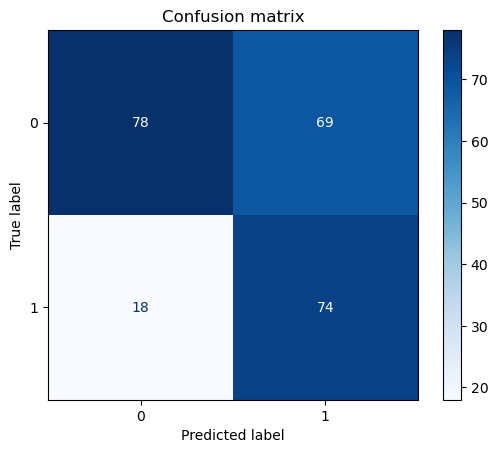

In [64]:
disp = ConfusionMatrixDisplay.from_estimator(
        meta_model,
        Xtest_meta,
        ytest,
        display_labels=meta_model.classes_,
        cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion matrix')
plt.show()

In [65]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.53      0.64       147
           1       0.52      0.80      0.63        92

    accuracy                           0.64       239
   macro avg       0.66      0.67      0.64       239
weighted avg       0.70      0.64      0.64       239



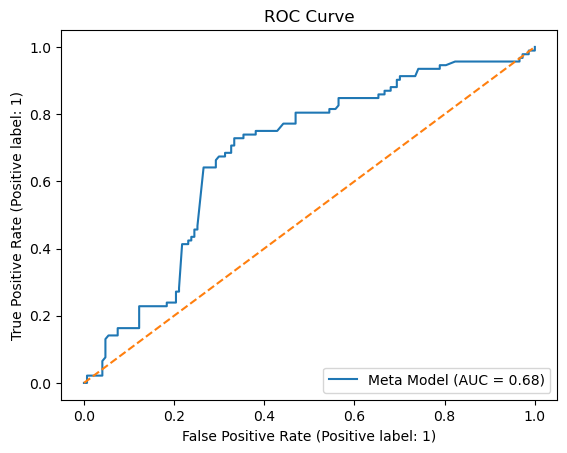

In [66]:
disp_roc = RocCurveDisplay.from_estimator(
        meta_model,
        Xtest_meta,
        ytest,
        name='Meta Model')
disp_roc.ax_.set_title('ROC Curve')
plt.plot([0,1], [0,1], linestyle='--')
plt.show()

In [67]:
evaluate_model(meta_model, Xtest_meta, ytest)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy: 0.6359832635983264
Precision: 0.5174825174825175
Recall: 0.8043478260869565
F1 Score: 0.6297872340425532
ROC AUC Score: 0.6828970718722271

Confusion Matrix:
 [[78 69]
 [18 74]]

Classification Report:
               precision    recall  

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
SVM.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [70]:
#Tune SVM Model
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

rs = RandomizedSearchCV(SVM, param_grid, scoring='f1', verbose=2, random_state=42, n_jobs=-1)
rs.fit(Xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=SVC(class_weight='balanced', probability=True,
                                 random_state=42),
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   random_state=42, scoring='f1', verbose=2)

In [71]:
rs.best_params_

{'kernel': 'rbf', 'gamma': 0.001, 'C': 1}

In [72]:
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [73]:
#Tune KNN Model
param_grid = {'leaf_size': [10, 20, 30, 40, 50,60,70],
              'n_neighbors': np.arange(1,51,1),
              'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

rs2 = RandomizedSearchCV(KNN, param_grid, scoring='f1', verbose=2, random_state=42, n_jobs=-1)
rs2.fit(Xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'leaf_size': [10, 20, 30, 40, 50, 60,
                                                      70],
                                        'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='f1', verbose=2)

In [74]:
rs2.best_params_

{'weights': 'uniform',
 'n_neighbors': 48,
 'metric': 'minkowski',
 'leaf_size': 50}

In [75]:
LR.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [76]:
#Tune Logistic Regression Model
param_grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]}

rs3 = RandomizedSearchCV(LR, param_grid, scoring='f1', verbose=2, random_state=42, n_jobs=-1)
rs3.fit(Xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test 

RandomizedSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                                max_iter=1000, n_jobs=-1,
                                                random_state=42),
                   n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 1000, 2500, 5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='f1', verbose=2)

In [77]:
rs3.best_params_

{'solver': 'saga', 'penalty': 'none', 'max_iter': 100, 'C': 3792.690190732246}

In [78]:
param_grid_rf = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None] + list(np.arange(5, 51, 5)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV with Random Forest model and parameter grid
rs4 = RandomizedSearchCV(forest, param_grid_rf, scoring='f1', verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
rs4.fit(Xtrain, ytrain)

# You can check the best parameters and the best score after fitting
print("Best parameters:", rs4.best_params_)
print("Best F1 score:", rs4.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Best parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 15, 'bootstrap': True}
Best F1 score: 0.4490686469391016


In [79]:
#Refit the models using the tuned parameters
SVM = SVC(**rs.best_params_, probability=True)
KNN= KNeighborsClassifier(**rs2.best_params_)
LR = LogisticRegression(**rs3.best_params_)
forest = RandomForestClassifier(**rs4.best_params_)

In [80]:
#Retrain tuned models and make predictions on validation set
SVM.fit(Xtrain,ytrain)
KNN.fit(Xtrain,ytrain)
LR.fit(Xtrain,ytrain)
forest.fit(Xtrain,ytrain)

SVM_Pred = SVM.predict_proba(Xval)
KNN_Pred = KNN.predict_proba(Xval)
LR_Pred = LR.predict_proba(Xval)
forest_Pred = forest.predict_proba(Xval)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [81]:
#Combine the predictions from the base models to use to train the meta model
Xval_meta = np.column_stack((SVM_Pred, KNN_Pred, LR_Pred, forest_Pred))

In [82]:
meta_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [83]:
#Tune the meta model
param_grid = {'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
            'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
            'min_child_weight': [1, 3, 5, 7],
            'gamma': [0.0, 0.1, 0.2 , 0.3, 0.4],
            'colsample_bytree': [0.3, 0.4, 0.5 , 0.7]}

rs5 = RandomizedSearchCV(meta_model, param_grid, scoring='f1', verbose=2, random_state=42, n_jobs=-1)
rs5.fit(Xval_meta,yval)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=42, scoring='f1', verbose=2)

In [84]:
meta_model = XGBClassifier(**rs5.best_params_)
meta_model.fit(Xval_meta, yval)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [85]:
SVM_Pred2 = SVM.predict_proba(Xtest)
KNN_Pred2 = KNN.predict_proba(Xtest)
LR_Pred2 = LR.predict_proba(Xtest)
forest_Pred2 = forest.predict_proba(Xtest)

Xtest_meta = np.column_stack((SVM_Pred2, KNN_Pred2, LR_Pred2, forest_Pred2))

In [86]:
y_pred = meta_model.predict(Xtest_meta)

In [87]:
acc_train = accuracy_score(yval, meta_model.predict(Xval_meta))
acc_test = accuracy_score(ytest, y_pred)

print(f'Train Accuracy: {acc_train}, Test Accuracy: {acc_test}')

Train Accuracy: 0.8791666666666667, Test Accuracy: 0.6652719665271967


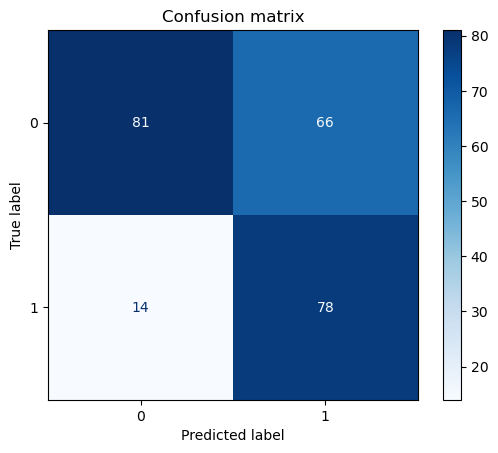

In [88]:
disp = ConfusionMatrixDisplay.from_estimator(
        meta_model,
        Xtest_meta,
        ytest,
        display_labels=meta_model.classes_,
        cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion matrix')
plt.show()

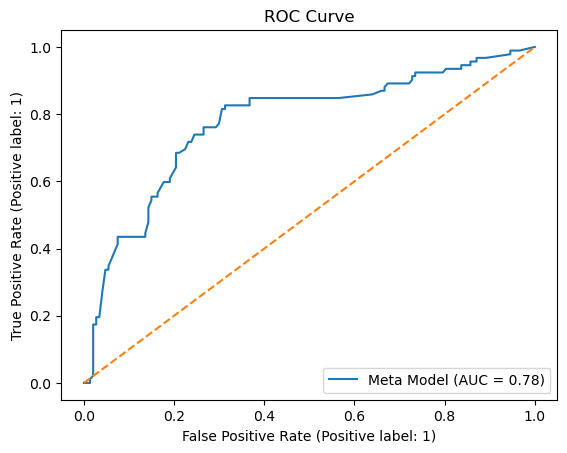

In [89]:
disp_roc = RocCurveDisplay.from_estimator(
        meta_model,
        Xtest_meta,
        ytest,
        name='Meta Model')
disp_roc.ax_.set_title('ROC Curve')
plt.plot([0,1], [0,1], linestyle='--')
plt.show()

In [90]:
evaluate_model(meta_model, Xtest_meta, ytest)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy: 0.6652719665271967
Precision: 0.5416666666666666
Recall: 0.8478260869565217
F1 Score: 0.6610169491525423
ROC AUC Score: 0.7765454007690032

Confusion Matrix:
 [[81 66]
 [14 78]]

Classification Report:
               precision    recall  f1-score 

In [101]:
Backtesting = data.iloc[:239]

In [102]:
Backtesting['Model'] = y_pred

/var/folders/n9/chxsdfg102q6fgpf3t0rq8q00000gn/T/ipykernel_20479/2522725253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Backtesting['Model'] = y_pred


In [107]:
Backtesting['Close Price'] = df['Close']

/var/folders/n9/chxsdfg102q6fgpf3t0rq8q00000gn/T/ipykernel_20479/3085208712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Backtesting['Close Price'] = df['Close']


In [108]:
Backtesting

,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ACCBL_20,ACCBM_20,ACCBU_20,AD,ADOSC_3_10,ADX_14,...,VTXM_14,VWAP_D,VWMA_10,WCP,WILLR_14,WMA_10,ZL_EMA_10,ZS_30,Model,Close Price
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-13,87.166001,88.416988,85.915014,1.250987,83.975365,86.9810,89.730368,1.585709e+08,2.594460e+07,17.134584,...,0.927781,88.340001,87.265404,88.327501,-9.142848,87.401819,87.678440,1.117167,1,88.290001
2014-05-14,87.474668,88.690922,86.258414,1.216254,84.342643,87.1200,89.715145,1.473245e+08,2.004845e+07,16.155232,...,0.979805,87.933334,87.291810,87.907501,-22.285679,87.486365,87.951451,0.825349,0,87.830002
2014-05-15,87.582668,88.809838,86.355497,1.227170,84.388542,87.1680,89.833541,1.360802e+08,1.223609e+07,16.094198,...,0.965239,87.226667,87.236773,87.205000,-42.000035,87.437455,87.865732,0.333878,0,87.139999
2014-05-16,87.756001,88.976027,86.535975,1.220026,84.427180,87.2435,89.902181,1.969193e+08,2.728565e+07,16.037539,...,0.972423,87.370000,87.286350,87.455000,-29.220811,87.501455,87.742871,0.933547,1,87.709999
2014-05-19,87.779334,88.995358,86.563310,1.216024,84.460538,87.3175,90.015538,2.212081e+08,3.869002e+07,15.263639,...,0.940832,88.026667,87.319668,88.100000,-9.415609,87.672364,87.853257,1.412997,0,88.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-17,107.289333,108.445742,106.132924,1.156409,104.080104,106.6515,109.360095,1.137623e+09,6.707728e+06,14.679566,...,0.870229,106.170001,106.821460,106.130001,-58.663232,107.138000,107.111384,-0.583429,0,106.010002
2015-04-20,107.200666,108.398648,106.002685,1.197981,103.907236,106.6050,109.369728,1.158042e+09,1.009960e+07,14.136894,...,0.848148,107.296666,107.001198,107.372499,-19.306896,107.253091,107.278405,0.841712,0,107.599998
2015-04-21,107.400000,108.572116,106.227884,1.172116,103.890731,106.5920,109.350724,1.147610e+09,7.249795e+06,13.141368,...,0.796845,108.133334,107.195980,108.115000,-8.599643,107.422363,107.460513,1.231077,1,108.059998


In [125]:
S = Backtesting.loc[Backtesting['Model'] == 1]

In [126]:
S

,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ACCBL_20,ACCBM_20,ACCBU_20,AD,ADOSC_3_10,ADX_14,...,VTXM_14,VWAP_D,VWMA_10,WCP,WILLR_14,WMA_10,ZL_EMA_10,ZS_30,Model,Close Price
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-13,87.166001,88.416988,85.915014,1.250987,83.975365,86.9810,89.730368,1.585709e+08,2.594460e+07,17.134584,...,0.927781,88.340001,87.265404,88.327501,-9.142848,87.401819,87.678440,1.117167,1,88.290001
2014-05-16,87.756001,88.976027,86.535975,1.220026,84.427180,87.2435,89.902181,1.969193e+08,2.728565e+07,16.037539,...,0.972423,87.370000,87.286350,87.455000,-29.220811,87.501455,87.742871,0.933547,1,87.709999
2014-05-27,89.247333,90.369406,88.125261,1.122073,85.312597,87.9380,90.282598,3.027974e+08,5.381826e+07,14.095907,...,0.819959,90.739998,88.391091,90.804998,-0.364238,89.099090,90.150345,2.815790,1,91.000000
2014-05-30,90.710000,91.726463,89.693536,1.016464,86.047535,88.4945,90.700032,3.297771e+08,4.881899e+07,17.077991,...,0.659437,91.196665,89.394344,91.224998,-2.874734,90.303636,91.398304,2.240411,1,91.309998
2014-06-02,91.003333,92.005366,90.001300,1.002033,86.218494,88.6810,90.863491,3.434615e+08,4.950034e+07,17.772598,...,0.732823,91.100001,89.937421,91.130001,-4.722710,90.592546,91.405885,1.973254,1,91.220001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-14,107.154667,108.300505,106.008828,1.145838,103.957438,106.7180,109.522430,1.142027e+09,1.149186e+07,16.180392,...,1.067091,107.136665,106.282909,107.144999,-29.227035,106.836546,107.544434,0.297626,1,107.169998
2015-04-15,107.419333,108.548782,106.289884,1.129449,104.028335,106.7665,109.560829,1.150197e+09,1.246792e+07,15.273543,...,1.000649,107.743332,106.521898,107.767498,-13.043502,107.100182,107.694536,0.903130,1,107.839996
2015-04-16,107.558000,108.644152,106.471847,1.086152,104.284302,106.7550,109.341793,1.153571e+09,1.280739e+07,14.431470,...,0.840610,107.656667,106.846157,107.665001,-17.079076,107.295818,107.682803,0.817538,1,107.690002


In [132]:
#Buying one share every day for the time period regardless of model output

(Backtesting['Close Price'].sum() - (239*88.29))/Backtesting['Close Price'].sum()

0.11821496144681604

In [135]:
#Buying one share every day for the time period where Model returns a buy signal
(S['Close Price'].sum() - (144*88.29))/S['Close Price'].sum()

0.12029260488527452

Utilizing the model to buy shares and dollar cost average would return 12.03% during this time period while dollar cost averaging every day regardless would return 11.8%

Utilizing the results of the model, we can preform backtesting using a trading strategy on QQQ to help illustrate its usefulness. In our example we will observe the QQQ ETF during the period of 2014-05-13 to 2015-04-23. During this time period if we were to purchase a share every dayin order to dollar cost average our position, our returns would come out to approximately 11.8%. On the contrary, had we only purchased a share when our model gave us a buy signal(class of 1), we would have a return of approximately 12.1%. This gives our model a slight .3%edge on returns during this time period by simply dollar cost averaging and buying shares when the model instructs. This 0.3% may seem very small to the naked eye, however this edge can be very significant for many large investors.